# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

State bottle retail minus state bottle cost is a reductive but "close-enough" way to measure profit. (Technically, you also have to consider overhead of a physical store, shipping costs, and employee salaries.)

So what is the most profitable item? I think considering the bottle volume has the potential to double-count, since a larger volume of an item will cost more than a smaller volume of that same item (and is thus already built into cost). So I am choosing not to use that in my calculations. I think the most profitable item is the one that has the highest (state bottle retail - state bottle cost) * bottles sold.

In [6]:
# Imports
import pandas as pd

# Reading the CSV in
iowa = pd.read_csv('/Users/Caroline/Desktop/school/understanding_uncertainty/data/iowa.csv')

# Creating a col to calculate my definition of profit
iowa['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']).mul(iowa['Bottles Sold'])

#Creating a new df: grouping by item, selecting only the profit column, summing it, then sorting it with highest values at top
iowa_2 = iowa.groupby("Item Description")['Profit'].sum().sort_values(ascending=False) # No column specification bc a Series is a single column already

# Creating a new df from the top 5 rows of the df above
iowa_top = iowa_2.head()

# Checking with a print statement
print(iowa_top)

# Imports
import plotly.express as px

# Making the figure in plotly
fig = px.bar(iowa_top, y='Profit', title='Top Five Liquors Sold in Iowa')
fig.show()

Item Description
TITOS HANDMADE VODKA         364074.35
BLACK VELVET                 274676.85
FIREBALL CINNAMON WHISKEY    187535.22
CROWN ROYAL                  160981.95
CROWN ROYAL REGAL APPLE      122880.40
Name: Profit, dtype: float64


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [7]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x - y # ValueError: operands could not be broadcast together with shapes (3,) (2,) 

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
x.reshape(-1,1) - y.reshape(-1,1) # ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

# We've changed x to a 3x1 vector and y to a 2x1 vector. The dimensions of x and y must be the same and these are not.

ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

In [ ]:
x.reshape(1,-1) - y.reshape(1,-1) # ValueError: operands could not be broadcast together with shapes (1,3) (1,2) 

# We've changed x to a 1x3 vector and y to a 1x2 vector. The dimensions of x and y must be the same and these are not.

ValueError: operands could not be broadcast together with shapes (1,3) (1,2) 

In [ ]:
# Write two double for-loops to replicate the results of the previous two answers. 

for i in range (-1):
    for j in range (1):
        x.reshape(i, j)
        y.reshape(i, j)

print(x)
print(y)


for i in range (1):
    for j in range (-1):
        x.reshape(i, j)
        y.reshape(i, j)

print(x)
print(y)


[1 3 5]
[2 5]
[1 3 5]
[2 5]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

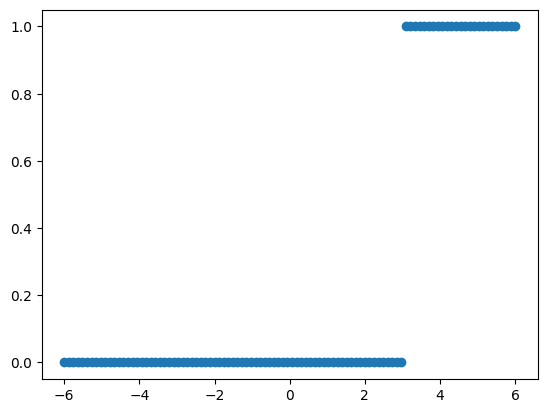

In [8]:
# Defining the function

# Is there a typo? It looks like it takes 0 if x > z if true. And where does y come from - is it intended that x = 3?

def func(z):
    if 3 > z:
        return 0
    if 3 <= z:
        return 1
"""   
def func_alternative(z):
    return 3 <= z
""" 
# Imports 
import matplotlib.pyplot as plt

# Assigning some values for z
z = np.linspace(-6, 6, 100) # 100 points from -6 to 6
f = list(map(func, z))

# Plotting
plt.scatter(z, f) # Can't directly apply function to an array; func expects a single value. So maps applies each value individually
plt.show()




$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$


So putting the negative sign in gives this:

$$
- \mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
-1, &x \le z
\end{cases}
$$

And adding one gives this:

$$
1 - \mathbb{I}\{x \le z\} = \begin{cases}
0 + 1, &x > z \\
-1 + 1, &x \le z
\end{cases}
$$

Which is

$$
1 - \mathbb{I}\{x \le z\} = \begin{cases}
1, &x > z \\
0, &x \le z
\end{cases}
$$

AND $ \mathbb{I}\{ x > z \}$ is 


$$
\mathbb{I}\{x > z\} = \begin{cases}
1, &x > z \\
0, &x \le z
\end{cases}
$$


so $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$

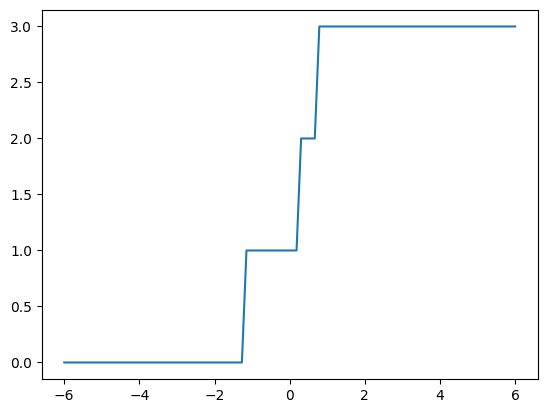

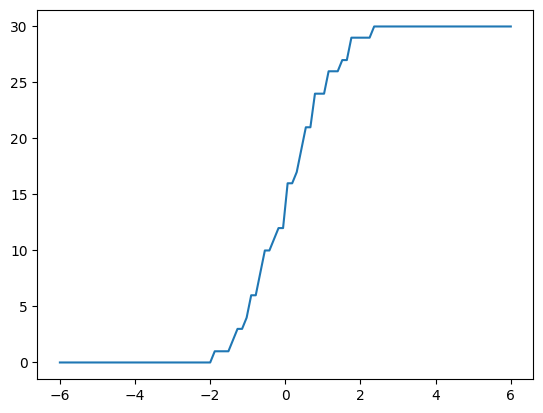

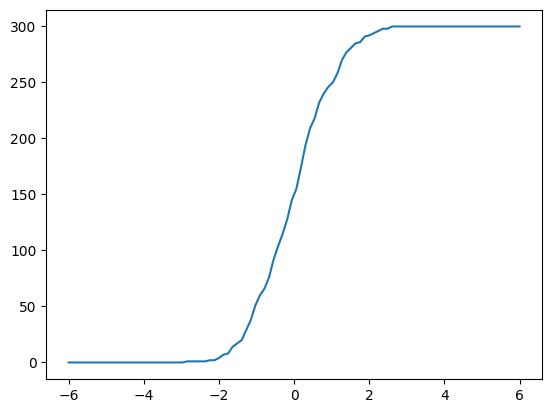

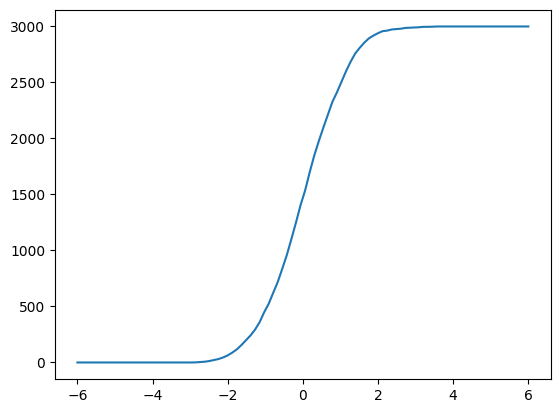

In [9]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N) # X is a normal distribution from 1 to N where N is 3, 30, 300, or 3000. This forms the grid.
    # ECDF plot goes here:
    ecdf = 0 * z.copy() # Create a space for values where z is my data

    def indicate(z,X): 
        ''' Indicator function for computing ECDFs. '''
        return z <= X # where X is the grid and z is the range of values we are testing
    
    for i in range(len(X)):
        F_i = indicate(X[i],z) # For each i in len(X), 
        ecdf += F_i

    plt.show()  

    sns.lineplot(x=z, y=ecdf)

    # Future challenge: normalize by sample size so pictures range from 0 to 1.




- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

**My Answer**:

As $N$ increases, the probability that the function will return 1 increases. You don't see this in my graph bc I have not normalized to the sample size.

**Right Answer (Given on Prof Johnson's Github):**

As the sample size, N gets large, the jagged step function gets closer and closer to a smooth curve. The line for N = 3000 looks almost continuous, while even for 30 and 300 it looks somewhat jagged. Likewise, the curves seem to be centered around the same limit: They're modeling the same underlying phenomenon, just with different levels of resolution.



4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [11]:
# Imports
import math

def quantile(q, z):
    # Start by sorting the data
    z = sorted(z)
    # Multiply q proportion by the num items in z. Subtract 1 bc list is zero-indexed. This gives the index of the number at the q-quantile. Then round it down and index into that array.
    below = z[int(math.floor(q * (len(z)-1)))]
    # Calculate a value of q that looks nice for the string you print.
    q_int = int(q * 100)
    return(f"The {q_int}-quantile is {below}")
    
# Tests
for i in np.arange(0, 1.25, 0.25): # Can't use range bc only accepts int arguments. 1.25 used (thanks auto-AI results!) bc end value is not inclusive
    print(quantile(i, z))

print()

for i in np.arange(0, 1.25, 0.25): 
    print(quantile(i, [4, 1, 6, 7, 2, 3, 5, 8, 9]))


The 0-quantile is -6.0
The 25-quantile is -3.090909090909091
The 50-quantile is -0.06060606060606055
The 75-quantile is 2.9696969696969706
The 100-quantile is 6.0

The 0-quantile is 1
The 25-quantile is 3
The 50-quantile is 5
The 75-quantile is 7
The 100-quantile is 9


In [12]:
# Another approach
def quantile2(q, z, func): # q is the quantile and z is the data I'm putting in and func is my function
    # Initialize an empty list
    vals = []
    for i in range(0, len(z)):
        val = abs(q - z[i])
        vals.append(val)
    return min(vals)

# Test
print(f"The 50-quantile is {quantile2(0.5, z, ecdf)}")

print()

# Test different quantiles
for i in np.arange(0, 1.25, 0.25): 
    # Calculate a value of q that looks nice for the string you print.
    q_int = int(i * 100)
    print(f"The {q_int}-quantile is {quantile2(i, z, ecdf)}")

# Why did this return different values? This isn't working, so please disregard.

The 50-quantile is 0.04545454545454586

The 0-quantile is 0.06060606060606055
The 25-quantile is 0.05303030303030276
The 50-quantile is 0.04545454545454586
The 75-quantile is 0.03787878787878807
The 100-quantile is 0.030303030303030276


Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR



In [13]:
def iqr(z):
    # Start by sorting the data
    z = sorted(z)
    # Multiply q proportion by the num items in z. Subtract 1 bc list is zero-indexed. This gives the index of the number at the qth percentile. Then round it down and index into that array.
    twenty_five = z[int(math.floor(0.25 * (len(z)-1)))]
    seventy_five = z[int(math.floor(0.75 * (len(z)-1)))]
    iqr_val = seventy_five - twenty_five
    whiskers = (iqr_val * -1.5), (iqr_val * 1.5)
    return(f"The IQR is from {twenty_five} to {seventy_five} (i.e., {iqr_val}) and the whiskers are {whiskers[0]} and {whiskers[1]}")

print(iqr(z))
print()
# Simpler array to visualize
print(iqr([5,1,3,4,2,7,8,9,6]))

The IQR is from -3.090909090909091 to 2.9696969696969706 (i.e., 6.060606060606061) and the whiskers are -9.090909090909092 and 9.090909090909092

The IQR is from 3 to 7 (i.e., 4) and the whiskers are -6.0 and 6.0


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [ ]:
import math

def find_iq_range(z):
    # Start by sorting the data
    z = sorted(z)
    # Multiply q proportion by the num items in z. Subtract 1 bc list is zero-indexed. This gives the index of the number at the qth percentile. Then round it down and index into that array.
    twenty_five = z[int(math.floor(0.25 * (len(z)-1)))]
    seventy_five = z[int(math.floor(0.75 * (len(z)-1)))]
    iqr_val = seventy_five - twenty_five
    return iqr_val


iq_range = find_iq_range(z)

# This is a very robust "h"
u = 0.9 * min(np.std(z), iq_range/1.34) * len(z) **(-0.2)

# This is another, potentially easier conceptually value for "h".
# u = 1.06 * np.std(z) X len(z)**(-0.2)

kernels = {'gaussian': ((math.e)**(-(u**2)/2)/(math.sqrt(2*math.pi))),
           'epanechnikov': (3 * (1 - u**2) /4),
           'uniform': (1/2),
           'triangular': (1 - np.linalg.norm(u))
           }

# Compute plug-in bandwidth
def pib(N, h, k): # sample size, bandwidth, kernel
     # Initialize the val variable
     val = 0
     # Iteratively add to val through N
     for _ in range(1, N):
          val += k * h
     # Divide final val by N
     final = val/N
     return final

print(f"Gaussian: {pib(100, 3, kernels['gaussian'])}")
print(f"Epanechnikov: {pib(100, 3, kernels['epanechnikov'])}")
print(f"Uniform: {pib(100, 3, kernels['uniform'])}")
print(f"Triangular: {pib(100, 3, kernels['triangular'])}")






Gaussian: 0.5399949769280645
Epanechnikov: -1.2733230260315829
Uniform: 1.485
Triangular: -0.7533397888300574


In [ ]:
# Office Hours

for 